# California 90's Housing

## Database description

- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housingMedianAge: Median age of a house within a block; a lower number is a newer building-. totalRooms: Total number of rooms within a block
- totalBedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- medianHouseValue: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea

## A few considerations:

1. The median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, they said
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
\\$30,000). <br><br>

2. The housing median age and the median house value were also capped. To make predictions even beyond \\$500,000 house value, then there are mainly two options:<br>
a. Collect proper labels for the districts whose labels were capped.<br>
b. Remove those districts from the training set.


### Hypothesis
1. Houses closer to the ocean are more expansive
2. The more income greater the number of bedrooms
3. People with more income live in newer houses
4. People with more income live on more expansive houses

In [3]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
# Loading database

house = pd.read_csv(r"C:\Users\rodri\Documents\python_jupyter\eda_california_housing\housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Displaying dataTypes

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Displaying summary statistics

house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Identifying how many empty rows are inside of each column 

house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Deleting those 207 rows without 'total_bedrooms' data
house.dropna(subset='total_bedrooms',inplace=True)
len(house)

20433

In [ ]:
# Checking data about Ocean proximity
house['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [ ]:
# Calculate the mean of column 'median_house_value' grouped by 'ocean_proximity'
mean_ocean_prox = house.groupby('ocean_proximity').mean(numeric_only=True)
mean_ocean_prox


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.848642,34.560734,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,-119.733085,36.731806,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.261035,37.801304,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,-119.329836,34.736065,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


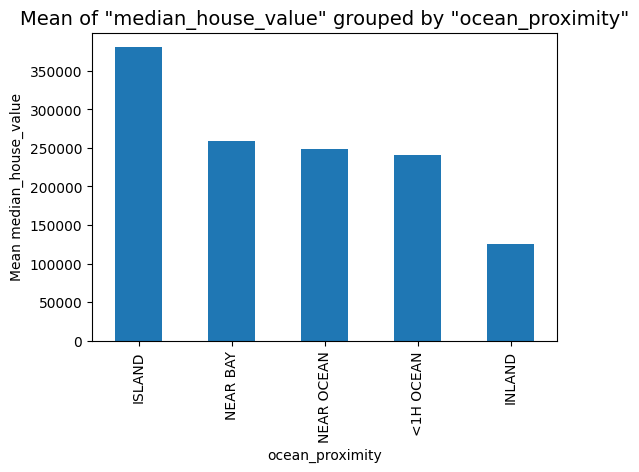

In [ ]:
# Calculate the mean of column 'median_house_value' grouped by 'ocean_proximity'
mean_ocean_prox = house.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

# Create a bar plot of the mean values
mean_ocean_prox.plot(kind='bar',figsize=(6, 4))

# Set the title and axis labels
plt.title('Mean of "median_house_value" grouped by "ocean_proximity"',fontsize=14)
plt.xlabel('ocean_proximity')
plt.ylabel('Mean median_house_value')

# Show the plot
plt.show()

### Observation:
#### Hypothesis 1 = True ✅
1. Houses closer to the ocean are more expansive
> The average house value gets cheaper far from the ocean, confirming the first hypothesis. 


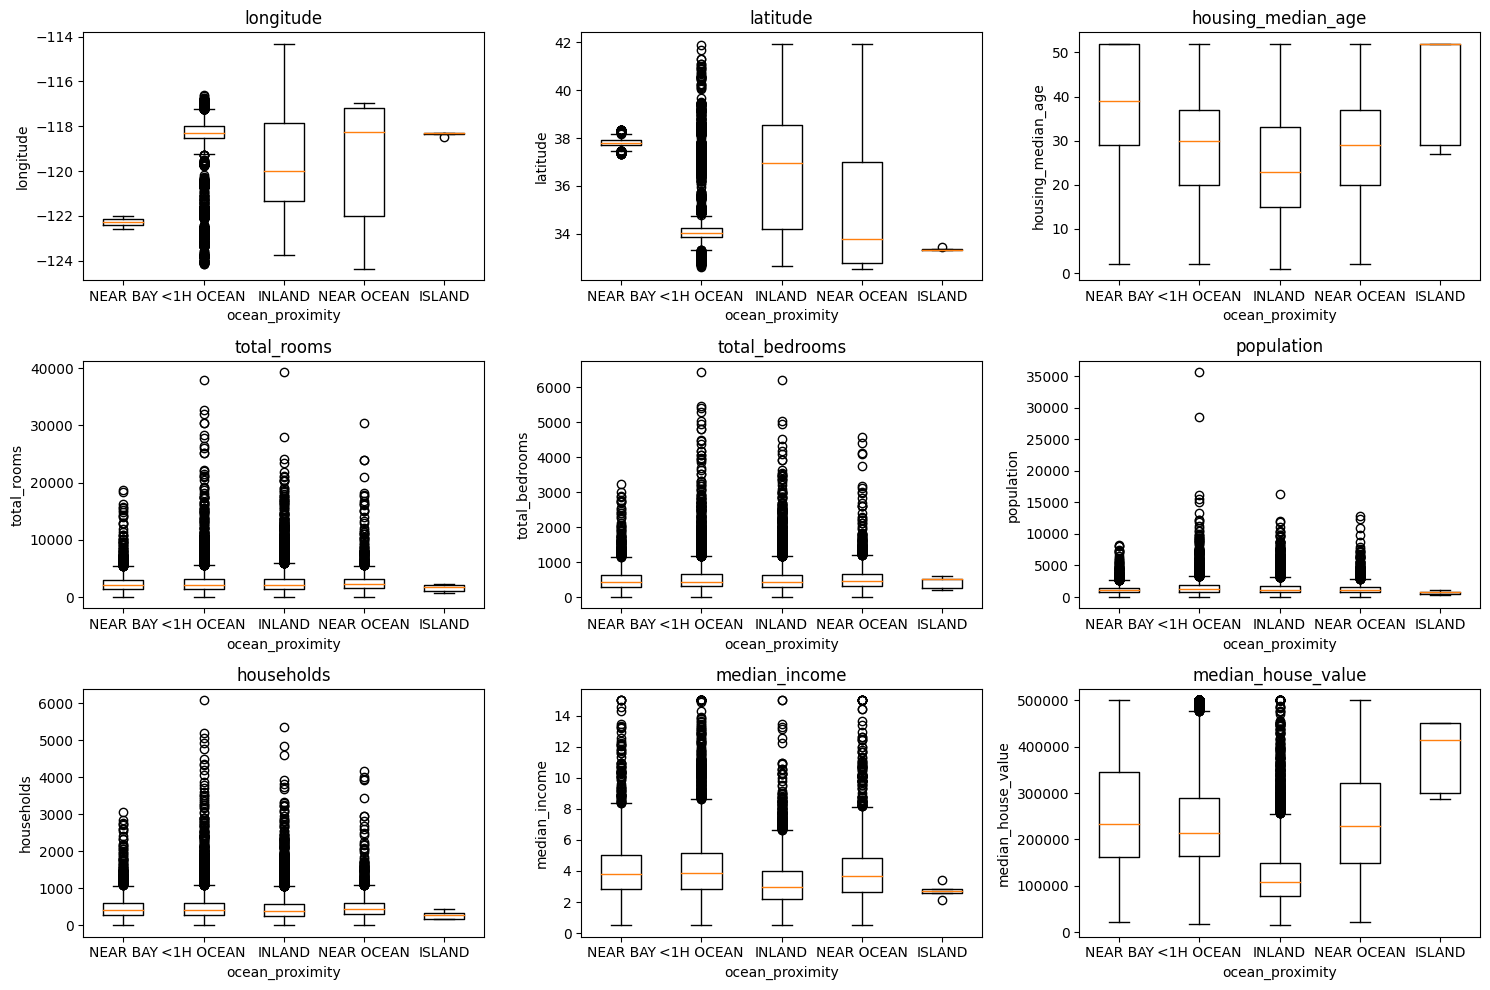

In [ ]:
## Define the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Loop through each column except 'ocean_proximity'
for i, col in enumerate(house.columns[:-1]):
    # Select the subplot to plot on
    ax = axes[i]

    # Loop through each unique value in 'ocean_proximity'
    data = []
    labels = []
    for ocean_proximity in house['ocean_proximity'].unique():
        # Filter the data for the current value of 'ocean_proximity'
        data.append(house[house['ocean_proximity'] == ocean_proximity][col])
        labels.append(ocean_proximity)

    # Plot the data on the selected subplot as a boxplot
    ax.boxplot(data, labels=labels)

    # Set the title and labels for the subplot
    ax.set_title(col)
    ax.set_xlabel('ocean_proximity')
    ax.set_ylabel(col)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

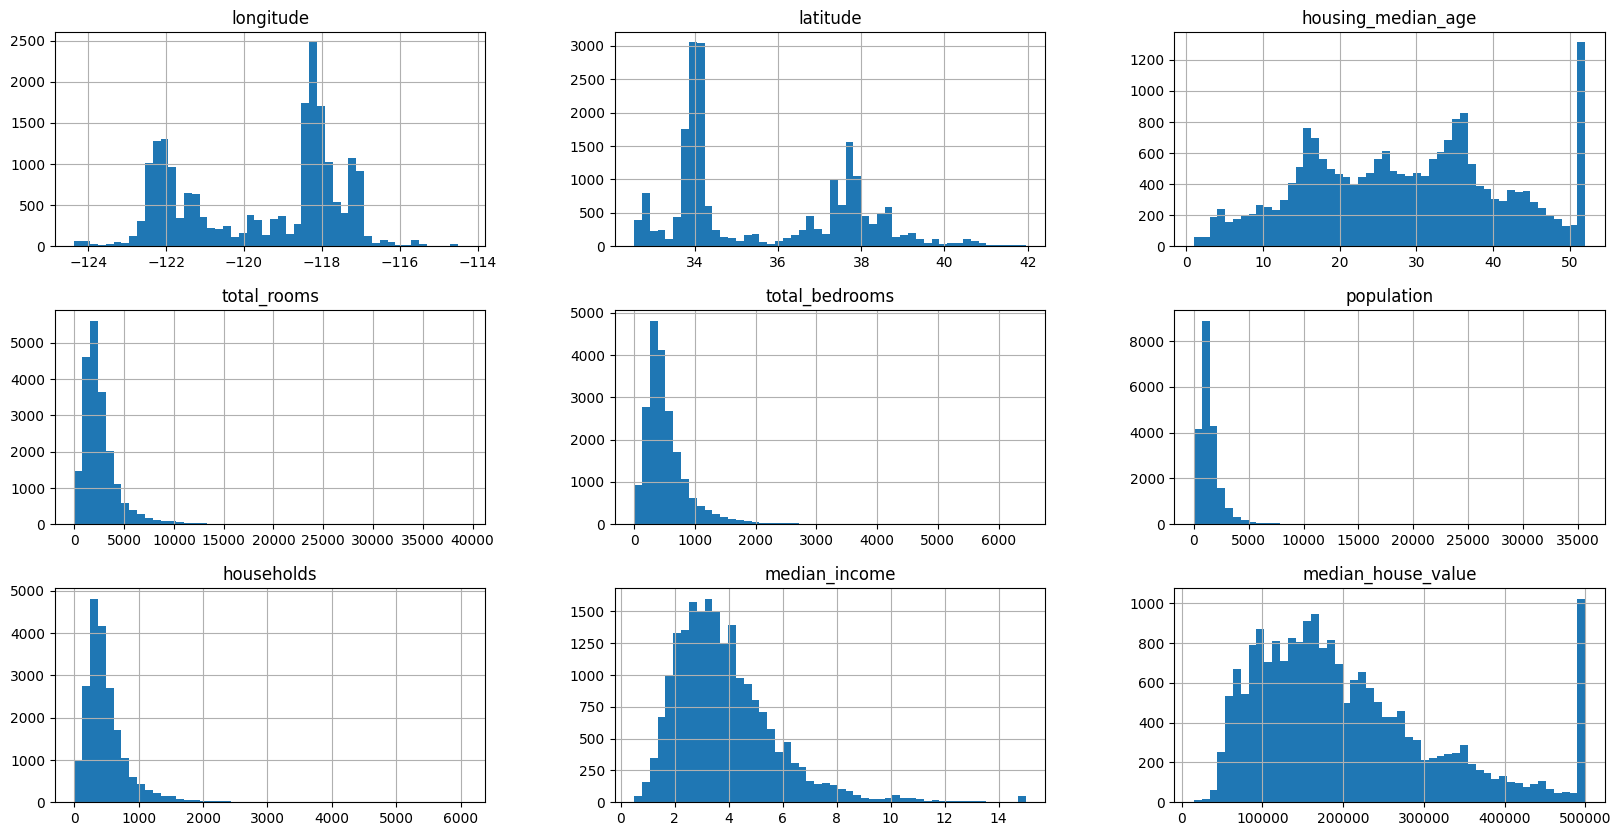

In [ ]:
# Ploting the histograms of each variable

fig = house.hist(bins=50,figsize=(20,10))
plt.show()

### Observations:
Here we can see the cap on **median_house_value** and **housing_median_age** acumulating data on the right side of the graphs.

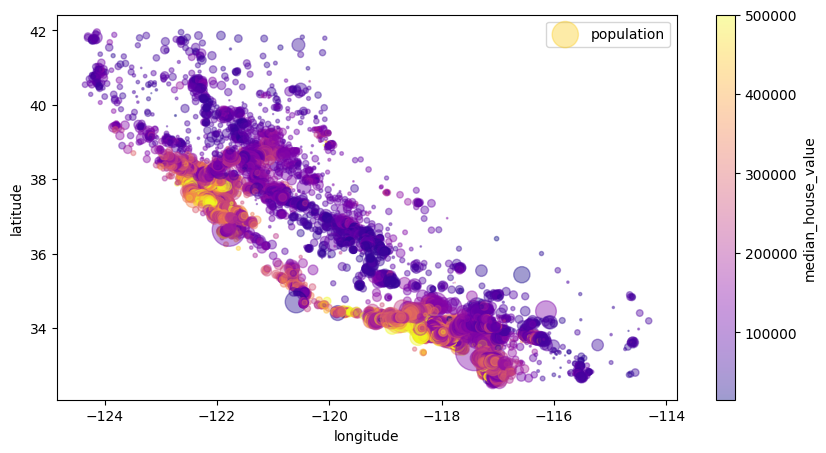

In [ ]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=house["population"]/50, label="population", figsize=(10,5),
 c="median_house_value", cmap=plt.get_cmap("plasma"), colorbar=True,
)
plt.legend()

In [ ]:
correlation = house.corr(numeric_only=True)
correlation['median_income'].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.688355
total_rooms           0.197882
households            0.013434
population            0.005087
total_bedrooms       -0.007723
longitude            -0.015550
latitude             -0.079626
housing_median_age   -0.118278
Name: median_income, dtype: float64

### Observations:
#### Hypothesis 2 = False ❌

2. The more income greater the number of bedrooms
> **median_income** and **total_bedrooms** have low correlation:  -0.007723


#### Hypothesis 3 = False ❌

3. People with more income live in newer houses
> **median_income** and **housing_mmedian_age** have low correlation:  -0.118278

#### Hypothesis 4 = True ✅

4. People with more income live on more expansive houses
> **median_income** and **median_house_value** have a good correlation:  0.688355

<Axes: >

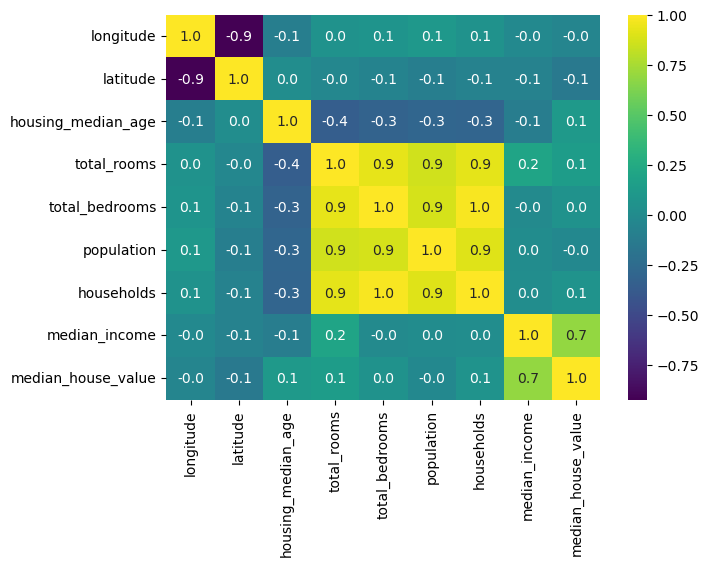

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt=".1f")

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

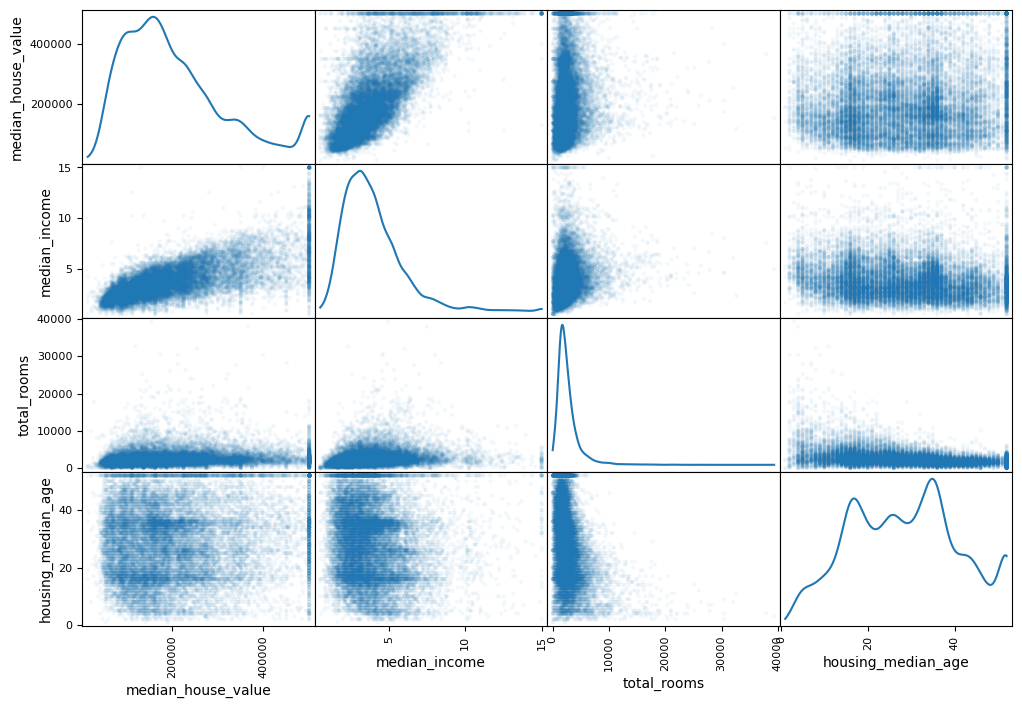

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

scatter_matrix(house[attributes], figsize=(12, 8),diagonal='kde',alpha=0.05)

<Axes: xlabel='median_income', ylabel='median_house_value'>

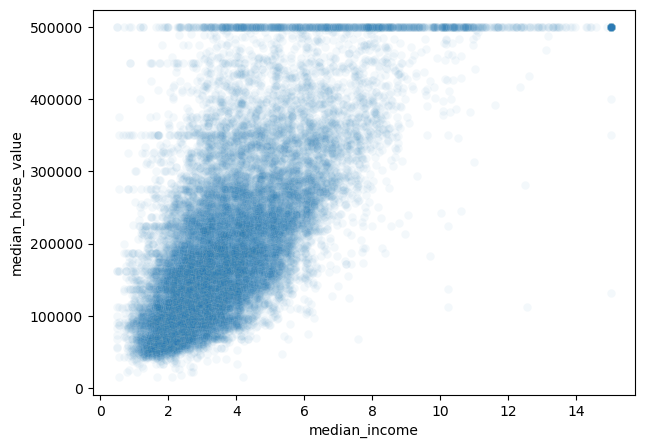

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=house,x='median_income',y='median_house_value',alpha=0.05)

### Observations:
This plot shows the strong correlation (0.69) between the variables, the more median_income greater the median_house_value tends to be. <br>
Also, we can clearly see a horizontal line on 500,000 that represents again the cap on the median_house_value.


In [ ]:
# Creating new columns to find more interesting insight
house['rooms_per_household'] = house['total_rooms'] / house['households']
house['bedrooms_per_room'] = house['total_bedrooms'] / house['total_rooms']
house['population_per_household'] = house['population'] / house['households']

correlation = house.corr(numeric_only=True)
correlation['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Observations:
The new column **rooms_per_household** has a stronger correlation than the *total_rooms* and *total_household*.<br>
Houses with lower **bedrooms_per_room** ratio tend to have a higher **median_house_value**.

## Conclusion

#### Hypothesis 1 = True ✅
1. Houses closer to the ocean are more expansive
> The average house value gets cheaper far from the ocean.

#### Hypothesis 2 = False ❌

2. The more income greater the number of bedrooms
> **median_income** and **total_bedrooms** have low correlation:  -0.007723


#### Hypothesis 3 = False ❌

3. People with more income live in newer houses
> **median_income** and **housing_mmedian_age** have low correlation:  -0.118278

#### Hypothesis 4 = True ✅

4. People with more income live on more expansive houses
> **median_income** and **median_house_value** have a good correlation:  0.688355